<a href="https://colab.research.google.com/github/saheli56/saheli56-Breast-Cancer-Classification-using-Machine-Learning/blob/main/Breast_Cancer_Classification_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Classify breast tumors as malignant or benign using the Breast Cancer Wisconsin Diagnostic Dataset from scikit-learn, employing Logistic Regression and Random Forest models, and evaluate their performance.

## Load the dataset

### Subtask:
Load the Breast Cancer Wisconsin Diagnostic Dataset from scikit-learn.


**Reasoning**:
Load the breast cancer dataset and convert it into a pandas DataFrame and Series.



In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
cancer = load_breast_cancer()

# Convert to DataFrame and Series
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.Series(cancer.target, name='target')

# Display the first few rows of the DataFrame
display(df.head())
display(target.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,target
0,0
1,0
2,0
3,0
4,0


## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the data, including checking for null values, analyzing the distribution of classes, and visualizing feature correlations.


**Reasoning**:
Perform EDA by checking for null values, analyzing class distribution, calculating correlation, and visualizing the correlation matrix.



Null values in DataFrame:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Distribution of target variable:
target
1    357
0    212
Name: count, dtype: int64


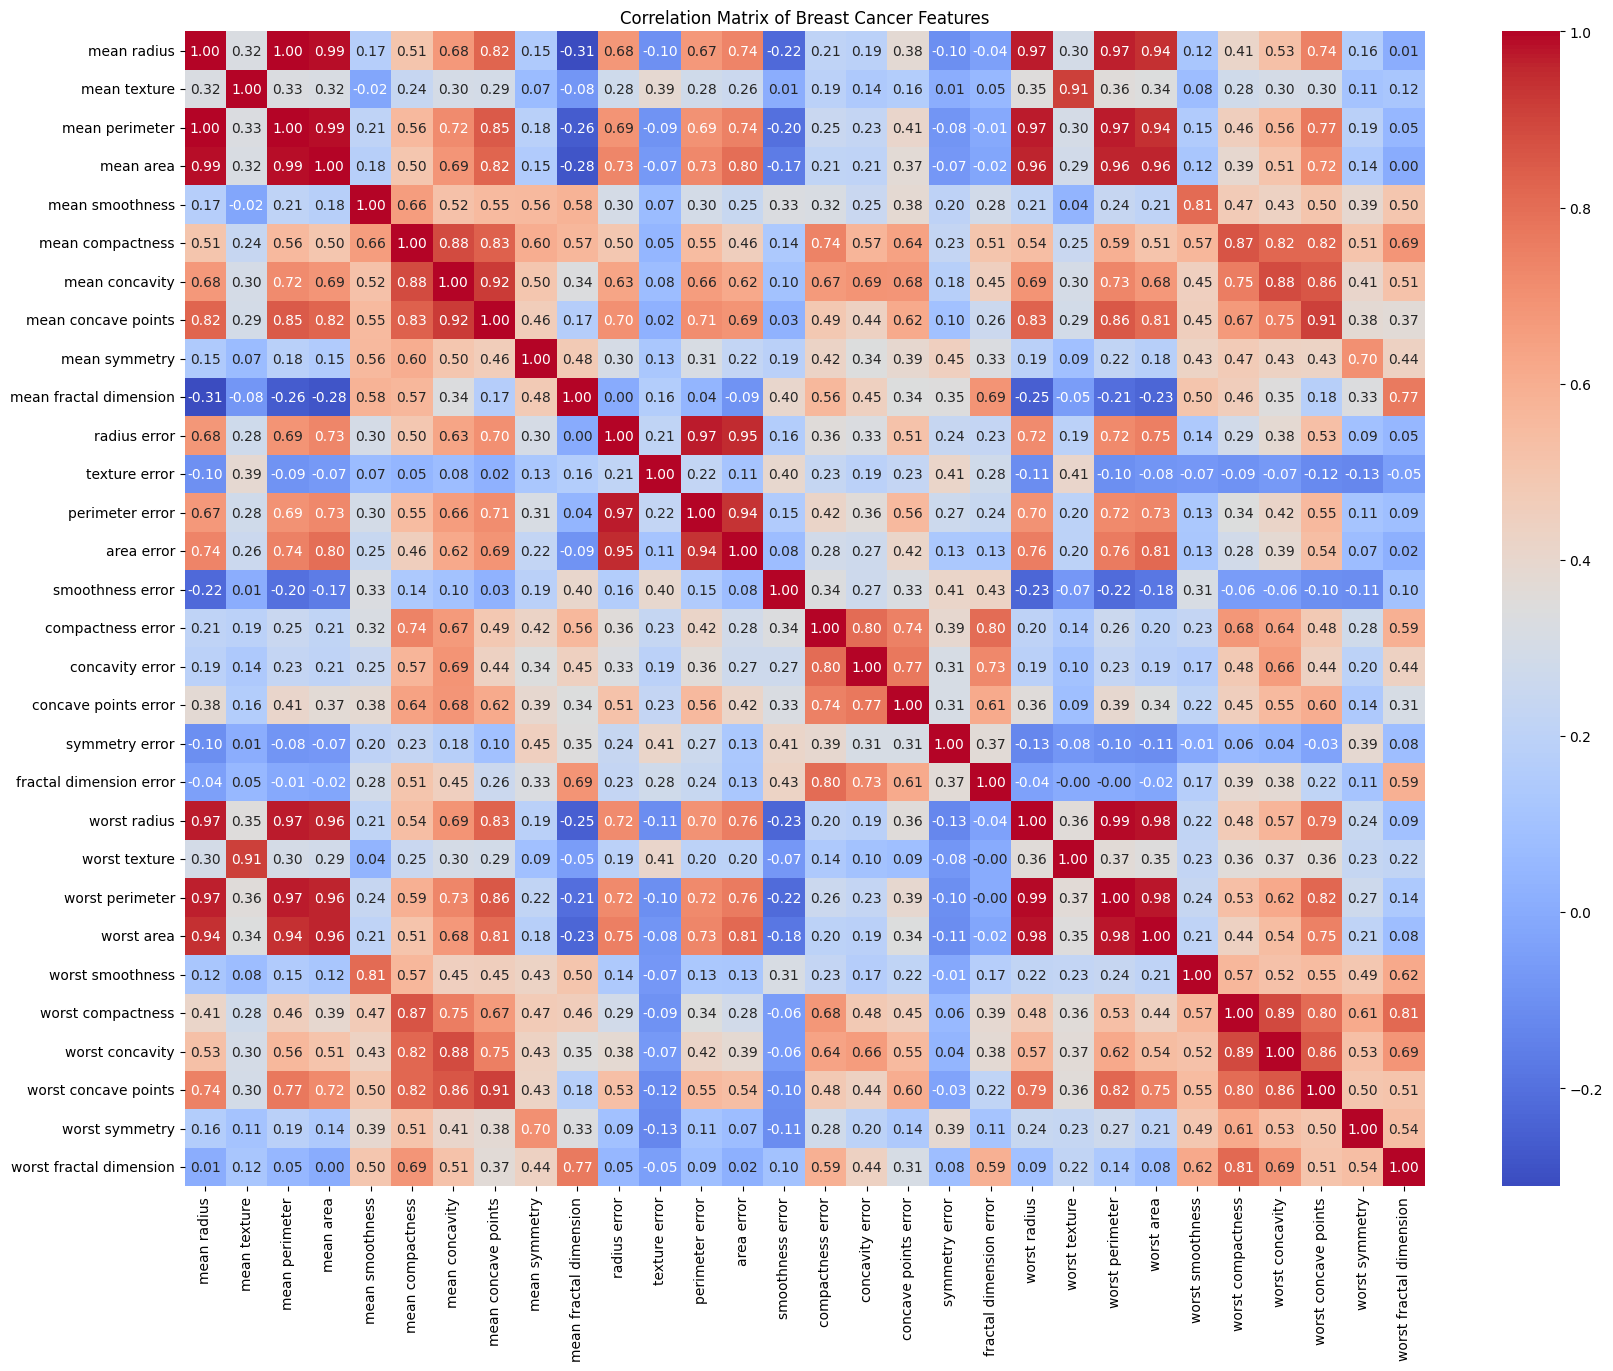

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check for null values
print("Null values in DataFrame:")
print(df.isnull().sum())

# 2. Print the value counts of the target variable
print("\nDistribution of target variable:")
print(target.value_counts())

# 3. Calculate the correlation matrix
correlation_matrix = df.corr()

# 4. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Breast Cancer Features")
plt.show()

## Data preprocessing

### Subtask:
Standardize the features using `StandardScaler`.


**Reasoning**:
Standardize the features using StandardScaler as per the instructions.



In [3]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df)

# Display the first few rows of the scaled data (as a numpy array)
print("Scaled Data (first 5 rows):")
print(df_scaled[:5])

Scaled Data (first 5 rows):
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668

## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the scaled data and the target variable into training and testing sets.



In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Model implementation

### Subtask:
Implement and train Logistic Regression and Random Forest models.


**Reasoning**:
Import the necessary models and train the Logistic Regression and Random Forest classifiers using the training data.



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Instantiate and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the models using accuracy, confusion matrix, and classification report.


**Reasoning**:
Evaluate the performance of the trained Logistic Regression and Random Forest models using accuracy, confusion matrix, and classification report as per the instructions.



In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
y_pred_lr = log_reg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Model Evaluation:
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Random Forest Model Evaluation:
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Feature importance

### Subtask:
Visualize feature importance for the Random Forest model.


**Reasoning**:
Extract and visualize feature importances from the Random Forest model.



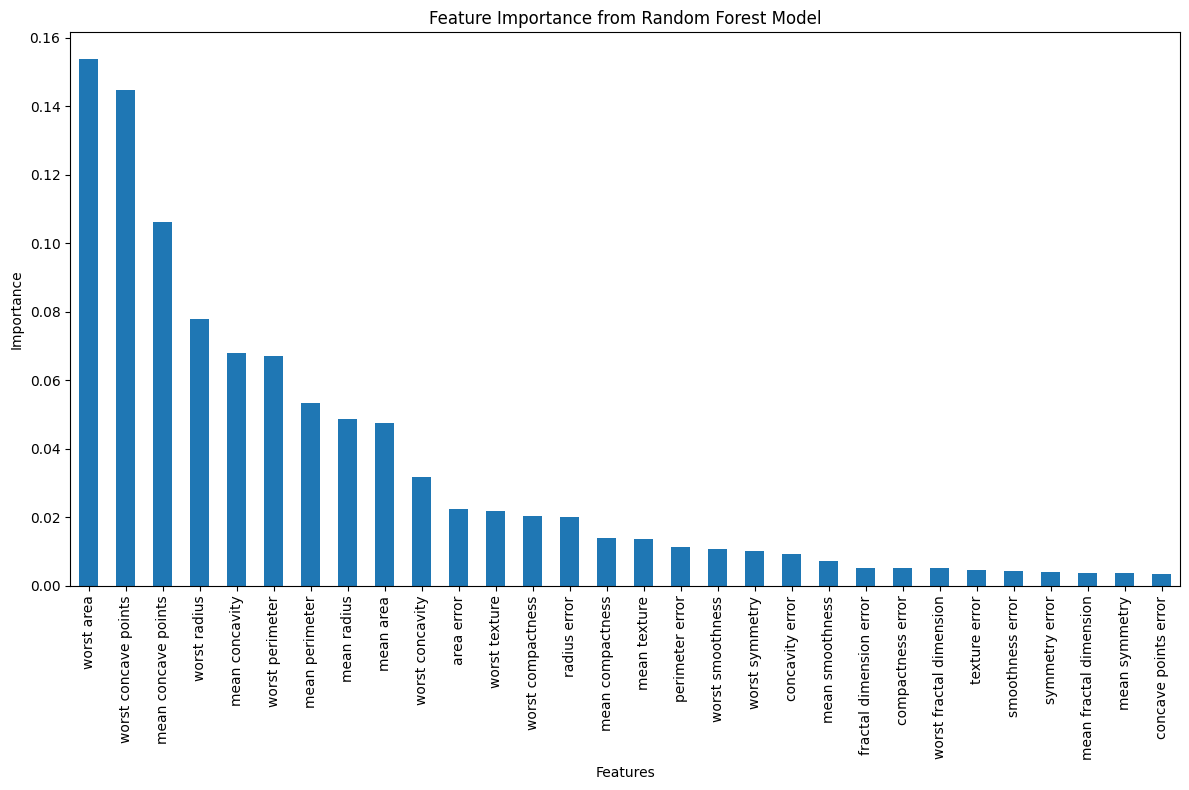

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract feature importances
feature_importances = rf_model.feature_importances_

# 2. Create a pandas Series
feature_importance_series = pd.Series(feature_importances, index=cancer.feature_names)

# 3. Sort the features by importance
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# 4. Create a bar plot
plt.figure(figsize=(12, 8))
sorted_feature_importances.plot(kind='bar')

# 5. Label the axes and add a title
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

# 6. Display the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains no missing values.
*   The target variable shows an imbalanced class distribution with 357 benign (1) and 212 malignant (0) cases.
*   Features were successfully standardized using `StandardScaler`.
*   The data was split into training (80%) and testing (20%) sets, resulting in 455 training samples and 114 testing samples.
*   Both Logistic Regression and Random Forest models were successfully trained.
*   Logistic Regression achieved an accuracy of 0.9737 on the test set, with a confusion matrix showing 41 True Negatives, 2 False Positives, 1 False Negative, and 70 True Positives.
*   Random Forest achieved an accuracy of 0.9649 on the test set, with a confusion matrix showing 40 True Negatives, 3 False Positives, 1 False Negative, and 70 True Positives.
*   Both models demonstrated high precision, recall, and f1-scores for both classes.
*   Feature importance analysis for the Random Forest model identified the most influential features in the classification process.

### Insights or Next Steps

*   Given the class imbalance, consider employing techniques like oversampling or undersampling the training data, or using evaluation metrics less sensitive to imbalance (e.g., F1-score, AUC-ROC) for future model comparisons.
*   Investigate the top features identified by the Random Forest model's importance analysis to potentially gain deeper insights into the characteristics that most strongly differentiate between benign and malignant tumors.


## Test with an Example

### Subtask:
Take a sample from the test set and test the accuracy of the models with an example.

**Reasoning**:
Select a sample from the test set, make predictions with both models, and display the predictions along with the actual target value.

In [8]:
# Select one example from the test set
example_index = 0
example_data = X_test[example_index].reshape(1, -1) # Reshape for single sample prediction
actual_target = y_test.iloc[example_index]

# Make predictions with Logistic Regression
lr_prediction = log_reg_model.predict(example_data)

# Make predictions with Random Forest
rf_prediction = rf_model.predict(example_data)

print(f"Example from test set (index {example_index}):")
print(f"Actual Target: {actual_target}")
print(f"Logistic Regression Prediction: {lr_prediction[0]}")
print(f"Random Forest Prediction: {rf_prediction[0]}")

# You can repeat this for other examples by changing example_index

Example from test set (index 0):
Actual Target: 1
Logistic Regression Prediction: 1
Random Forest Prediction: 1
